In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import wrangle as wr

In [2]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1390k  100 1390k    0     0  5360k      0 --:--:-- --:--:-- --:--:-- 5516k


In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()[1:].round(2).T

,mean,std,min,25%,50%,75%,max
longitude,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00
total_bedrooms,537.87,421.39,1.00,296.00,435.00,647.00,6445.00
population,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
households,499.54,382.33,1.00,280.00,409.00,605.00,6082.00
median_income,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00


In [8]:
df.ocean_proximity.nunique()

5

In [9]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Check the target variable  `median_house_value` distribution.

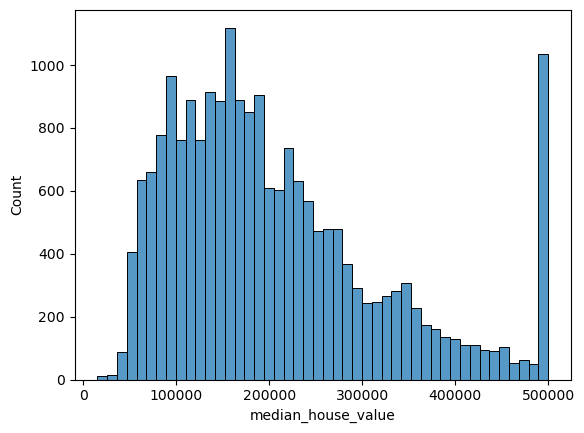

In [11]:
sns.histplot(data = df, x='median_house_value');

Clean the data.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [12]:
df.ocean_proximity.value_counts().head(2).index

Index(['<1H OCEAN', 'INLAND'], dtype='object')

In [13]:
df[df.ocean_proximity.isin(list(df.ocean_proximity.value_counts().head(2).index))]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
df = df[df.ocean_proximity.isin(df.ocean_proximity.value_counts().head(2).index)]

In [15]:
df.shape

(15687, 10)

In [16]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN


Same but with `query`

In [17]:
values = df.ocean_proximity.value_counts().head(2).index
df = df.query('ocean_proximity in @values')

In [18]:
df.shape

(15687, 10)

In [19]:
del df['ocean_proximity']

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [21]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0


In [22]:
df.shape

(15687, 9)

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [23]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [24]:
df.population.median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [25]:
np.random.seed(42)
n = len(df)

# 20% for validate, 20% for test and 60% for train
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# shuffle values to make the split random
idx = np.arange(n)
np.random.shuffle(idx)

# rearrange the values inside the dataframe
df_shuffled = df.iloc[idx]

# split with slicing the data
df_train = df_shuffled.iloc[:n_train].copy().reset_index(drop=True)
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy().reset_index(drop=True)
df_test = df_shuffled.iloc[n_train+n_val:].copy().reset_index(drop=True)

In [26]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(9413, 3137, 3137)

In [27]:
df_train.median_house_value = np.log1p(df_train.median_house_value)

In [28]:
df_train.median_house_value.describe()

count    9413.000000
mean       12.015274
std         0.564028
min         9.615805
25%        11.625370
50%        12.033509
75%        12.399586
max        13.122367
Name: median_house_value, dtype: float64

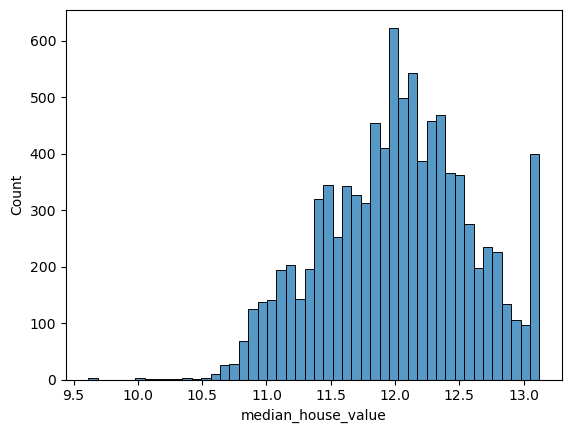

In [29]:
sns.histplot(df_train.median_house_value);

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model __without regularization__ using the code from the lessons.
* For computing the mean, use the training only!
* Use the __validation dataset__ to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [30]:
mean_total_bdrms = df_train.total_bedrooms.mean()
mean_total_bdrms

542.552956325786

In [31]:
df_train1 = df_train.copy()

In [32]:
df_train.total_bedrooms = df_train.total_bedrooms.fillna(0)
df_train1.total_bedrooms = df_train1.total_bedrooms.fillna(mean_total_bdrms)

In [33]:
df_train.total_bedrooms.describe()[1:]

mean     537.134920
std      444.606029
min        0.000000
25%      290.000000
50%      428.000000
75%      642.000000
max     6445.000000
Name: total_bedrooms, dtype: float64

In [34]:
df_train1.total_bedrooms.describe()[1:]

mean     542.552956
std      441.320739
min        2.000000
25%      295.000000
50%      435.000000
75%      642.000000
max     6445.000000
Name: total_bedrooms, dtype: float64

In [35]:
df_train.isnull().sum().sum(), df_train1.isnull().sum().sum()

(0, 0)

In [36]:
df_train.loc[:, df_train.columns[:-1]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [37]:
X_train = df_train.loc[:, df_train.columns[:-1]].values
X_train1 = df_train1.loc[:, df_train1.columns[:-1]].values

In [38]:
y_train = df_train.median_house_value.values

In [39]:
X_train[:1]

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01,  2.9350e+03,  5.2300e+02,
         1.9270e+03,  5.3000e+02,  2.5875e+00]])

In [40]:
# fillna for validate
df_val1 = df_val.copy()
df_val.total_bedrooms = df_val.total_bedrooms.fillna(0)
df_val1.total_bedrooms = df_val1.total_bedrooms.fillna(mean_total_bdrms)

In [41]:
# prepare X_val and X_val1
X_val = df_val.loc[:, df_val.columns[:-1]].values
X_val1 = df_val1.loc[:, df_val1.columns[:-1]].values

In [42]:
X_val1[1]

array([-117.88  ,   33.84  ,   34.    , 1410.    ,  214.    ,  837.    ,
        240.    ,    6.1168])

In [43]:
y_validate = df_val.median_house_value.values

In [44]:
y_validate

array([ 81600., 213900., 155200., ..., 279200., 229300., 158700.])

In [45]:
def train_linear_regression(X_train: np.array, y_train):
    # fit on train
    '''
    Parameters:
        X_train: 2-D array of features
        y_train: 1-D array of target variable
    The function calculates weights for linear regression equation.
    Returns:
        w[0] -> float, bias (y-intersect)
        w[1:] -> array of weights (floats)
    '''
    # add 1 to the beginning of every vector in features
    X = np.insert(X_train, 0, np.ones(len(X_train)), axis = 1)
    # get gram matrix
    XTX = X.T.dot(X)
    # inverse XTX
    XTX_inv = np.linalg.inv(XTX)
    # calculate weights
    w = XTX_inv.dot(X.T).dot(y_train)
    bias = w[0]
    weights = w[1:]

    return bias, weights

In [46]:
bias, weights = train_linear_regression(X_train, y_train)
bias1, weights1 = train_linear_regression(X_train1, y_train)

In [47]:
# calculate predictions for y_validate
y_val_pred = bias + X_val.dot(weights)
y_val_pred1 = bias1 + X_val1.dot(weights1)

In [48]:
# rmse score
def rmse(y, y_pred):
    ''' 
    y - actual prices
    y_pred - predicted prices

    calculates RMSE score
    '''
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [49]:
round(rmse(y_validate, y_val_pred), 2)

220623.92

In [50]:
round(rmse(y_validate, y_val_pred1), 2)

220623.92

Answer: both equal

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [51]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [52]:
import regression as regr

In [53]:
df_train.isnull().sum().sum()

0

In [54]:
results = pd.DataFrame(columns=['regulation', 'rmse_score'])
results

,regulation,rmse_score


In [55]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [56]:
y_validate = np.log1p(y_validate)

In [57]:
for r in r_values:
    # train the model with regularization
    bias, weights = regr.train_linear_regression_reg(X_train, y_train, r)
    # predict on validation
    y_pred = bias + X_val.dot(weights)
    score = regr.rmse(y_validate, y_pred)
    results.loc[len(results)] = [r, score]



In [58]:
results

,regulation,rmse_score
0,0.000000,0.340848
1,0.000001,0.340848
2,0.000100,0.340848
3,0.001000,0.340851
4,0.010000,0.340878
5,0.100000,0.341286
6,1.000000,0.344896
7,5.000000,0.347740
8,10.000000,0.348315


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [59]:
def split_data(df, seed):
    '''
    splits dataframe into train, validate, test
    where train is 60%, validate - 20%,test - 20% 
    Returns dataframes: df_train, df_val, df_test
    '''
    # make the split reproducible
    np.random.seed(seed)

    n = len(df)

    # 20% for validate, 20% for test and 60% for train
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    # shuffle values to make the split random
    idx = np.arange(n)
    np.random.shuffle(idx)

    # rearrange the values inside the dataframe
    df_shuffled = df.iloc[idx]

    # split with slicing the data
    df_train = df_shuffled.iloc[:n_train].copy().reset_index(drop=True)
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy().reset_index(drop=True)
    df_test = df_shuffled.iloc[n_train+n_val:].copy().reset_index(drop=True)

    return df_train, df_val, df_test

In [62]:
def get_X_y(df):
    X = df.copy()
    X.total_bedrooms = X.total_bedrooms.fillna(0)
    
    X_values = X.loc[:, X.columns[:-1]].values
    y = np.log1p(X.median_house_value)

    return X_values, y

In [63]:
results = pd.DataFrame(columns=['seeds', 'rmse_score'])

In [66]:
for seed in range(10):
    df_train, df_val, _ = split_data(df, seed)
    X_train, y_train = get_X_y(df_train)
    X_val, y_val = get_X_y(df_val)

    bias, weights = regr.train_linear_regression(X_train, y_train)
    y_pred = bias + X_val.dot(weights)
    score = regr.rmse(y_val, y_pred)

    results.loc[len(results)] = [seed, score]
    

In [67]:
results

,seeds,rmse_score
0,0.0,0.337739
1,1.0,0.337800
2,2.0,0.338429
3,3.0,0.332005
4,4.0,0.339445
5,5.0,0.343382
6,6.0,0.338533
7,7.0,0.346875
8,8.0,0.351274
9,9.0,0.334156


In [68]:
np.std(results.rmse_score) # 0.005

0.0054657181809521374

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [69]:
df_train, df_val, df_test = split_data(df, 9)
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

In [71]:
df_full_train.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12547,-116.99,32.85,32.0,5211.0,949.0,3025.0,948.0,4.0931,134200.0
12548,-122.68,38.48,15.0,1575.0,262.0,716.0,259.0,5.3409,244600.0
12549,-121.95,37.29,30.0,3734.0,813.0,1834.0,824.0,3.4505,260000.0


In [72]:
X_train, y_train = get_X_y(df_full_train)
X_test, y_test = get_X_y(df_test)

In [73]:
bias, weights = regr.train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = bias + X_test.dot(weights)
score = regr.rmse(y_test, y_pred)
score

0.3349899336611445